In [2]:
import torch
from utils import LQR_2D_true_solution, out_put, LQR_1D_true_solution, l_2_compute_1D_Q, l_2_compute_1D_V, true_V_eval_2D
from bases import bases_poly, d_bases_poly, sec_bases_poly, bases_2d, bases_poly_simp, d_bases_poly_simp, sec_bases_poly_simp, bases_2d_simp, bases_poly_2D, bases_poly_2D_s_a, d_bases_poly_2D, bases_poly_2D_simp, d_bases_poly_2D_simp, sec_d_bases_poly_2D, sec_d_bases_poly_2D_simp
from main_phibe import phibe_finder_1D_LQR, phibe_finder_2D_LQR
from main_RL import RL_finder_1D_LQR, RL_finder_2D_LQR
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [3]:
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

In [4]:
def reward(s, a):
    return - Q * (s**2) - R * (a**2)

In [10]:
A = 1
B = 1
sig = 1
R = 1
Q = 1
S = 0
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-2.4056824589538213 tensor([-240.5682,    0.0000,   -2.4057])


In [11]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 2
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:05<00:00, 15.72it/s]


In [12]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 2
order = 1
true_V = True_V
simple_basis = False
b_val_RL_1, V_exact_dist_RL_1 = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:03<00:00, 23.99it/s]


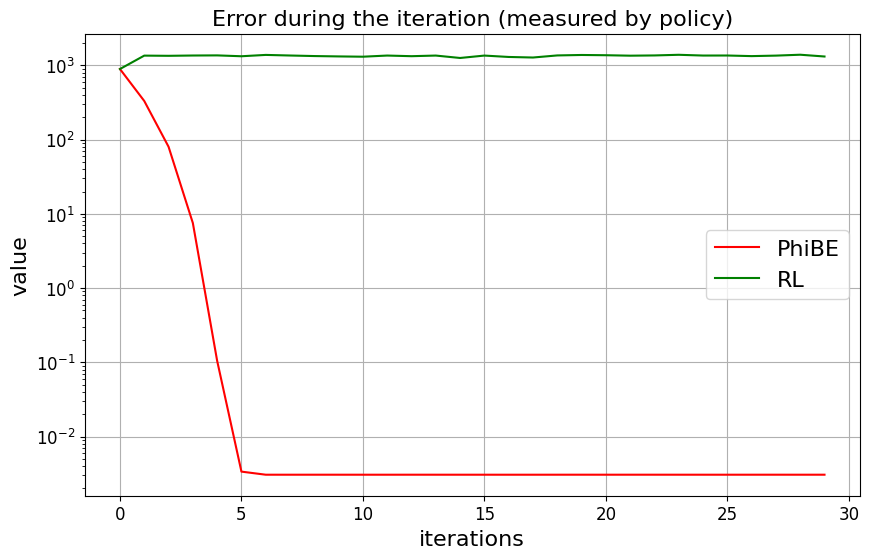

In [13]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL_1[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE', color='red')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

In [14]:
A = 1
B = 0.1
sig = 1.
R = 1
Q = 1
S = 0
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-19.950124999218758 tensor([-19950.1250,      0.0000,   -199.5012])


In [15]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 1
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:05<00:00, 15.68it/s]


In [16]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 1
order = 1
true_V = True_V
simple_basis = False
b_val_RL_2, V_exact_dist_RL_2 = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:03<00:00, 22.20it/s]


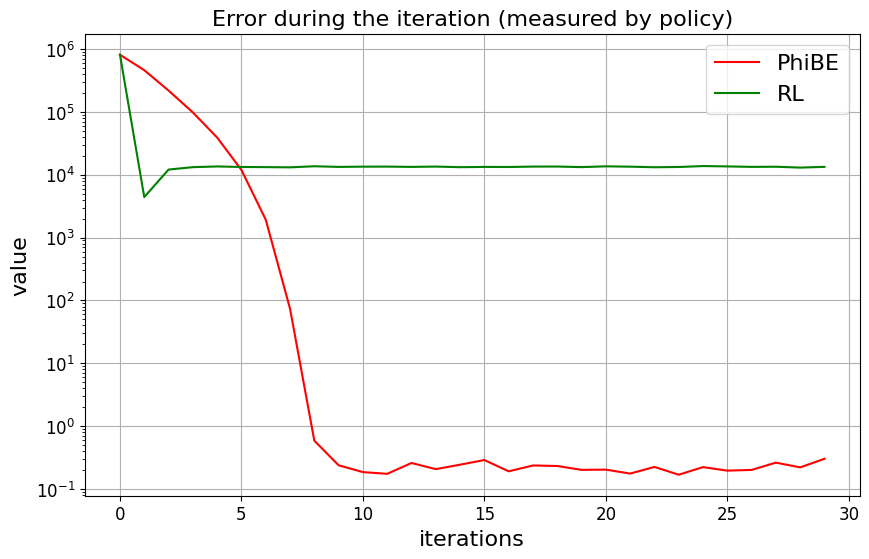

In [17]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_2[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL_2[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE', color='red')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

In [18]:
A = 1
B = 1
sig = 1.
R = 0.01
Q = 100
S = 0
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-100.99995000248738 tensor([-101.0000,    0.0000,   -1.0100])


In [19]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.1
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_3, V_exact_dist_phibe_3, V_func_phibe_3 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:04<00:00, 16.12it/s]


In [20]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 0.1
order = 1
true_V = True_V
simple_basis = False
b_val_RL_3, V_exact_dist_RL_3 = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:03<00:00, 21.42it/s]


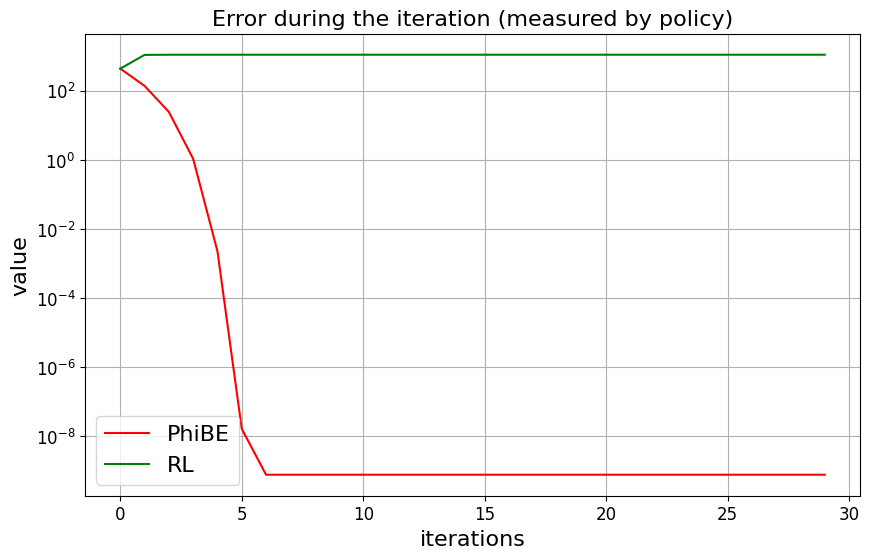

In [22]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_3[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL_3[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE', color='red')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

In [23]:
A = 100
B = 1
sig = 1.
R = 1
Q = 1
S = 0
beta = 0.01
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-199.995000125 tensor([-19999.5000,      0.0000,   -199.9950])


In [26]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.01
order = 1
true_V = True_V
simp_basis = False
deterministic = True
b_val_phibe_4, V_exact_dist_phibe_4, V_func_phibe_4 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:05<00:00, 15.83it/s]


In [24]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_Q = bases_2d
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 0.01
order = 1
true_V = True_V
simple_basis = False
b_val_RL_4, V_exact_dist_RL_4 = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:03<00:00, 22.96it/s]


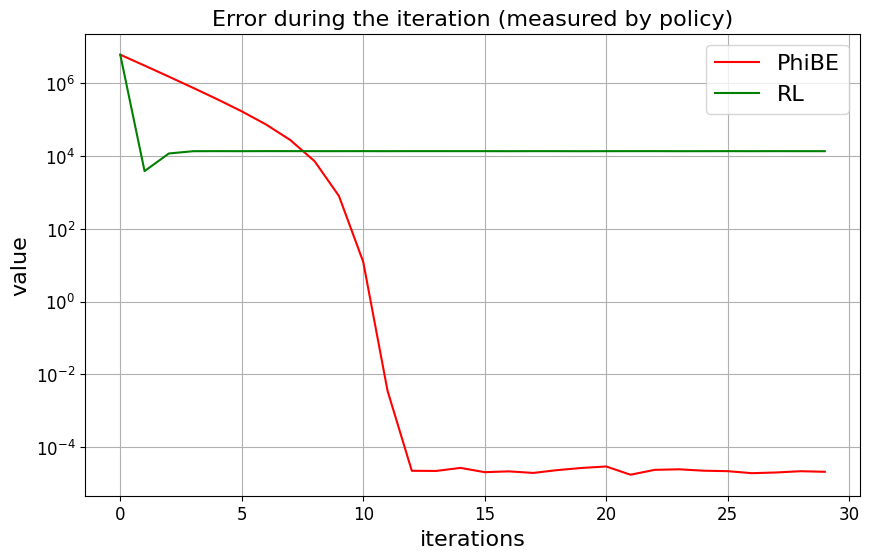

In [27]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_4[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL_4[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE', color='red')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()